In [4]:
!pip install pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [175]:
project='stackholder survey'

In [5]:
survey_df=pd.read_csv('survey.csv')
survey_df

Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes   

        Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0       NaN         13  Monthly        NaN            NaN             Germany   
1       NaN         19      NaN        NaN            NaN      United Kingdom   
2       NaN         15      NaN        NaN            NaN  Russian Federation   
3      25.0         18      NaN        NaN            NaN             Albania   
4      31.0         16      NaN        NaN            NaN       United States   
...     ...        ...      ...        ...            ...                 ...   
64456   NaN         16      NaN        NaN            NaN       United States   
64457   NaN        NaN      NaN        NaN            NaN             Morocco   
64458   NaN        NaN      NaN        NaN            NaN            Viet Nam   
64459   NaN        NaN      NaN        NaN            NaN              Poland   
64460   NaN        NaN      NaN        NaN            NaN               Spain   

         CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0       European Euro  ...  Neither easy nor difficult  Appropriate in length   
1      Pound sterling  ...                         NaN                    NaN   
2                 NaN  ...  Neither easy nor difficult  Appropriate in length   
3        Albanian lek  ...                         NaN                    NaN   
4                 NaN  ...                        Easy              Too short   
...               ...  ...                         ...                    ...   
64456             NaN  ...                         NaN                    NaN   
64457             NaN  ...                         NaN                    NaN   
64458             NaN  ...                         NaN                    NaN   
64459             NaN  ...                         NaN                    NaN   
64460             NaN  ...                         NaN                    NaN   

      Trans                                     UndergradMajor  \
0        No  Computer science, computer engineering, or sof...   
1       NaN  Computer science, computer engineering, or sof...   
2       NaN                                                NaN   
3        No  Computer science, computer engineering, or sof...   
4        No  Computer science, computer engineering, or sof...   
...     ...                                                ...   
64456   NaN  Computer science, computer engineering, or sof...   
64457   NaN                                                NaN   
64458   NaN                                                NaN   
64459   NaN                                                NaN   
64460   NaN  Computer science, computer engineering, or sof...   

            WebframeDesireNextYear                      WebframeWorkedWith  \
0                     ASP.NET Core                    ASP.NET;ASP.NET Core   
1                              NaN                                     NaN   
2                              NaN                           

In [6]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
survey_df.shape   # 61 columns # select the most important

(64461, 61)

In [17]:
schema_df=pd.read_csv('schema.csv',index_col='Column').QuestionText
schema_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [180]:
schema_df['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [181]:
# project name 
project='python-eda-stackoverflow-survey'

In [182]:
import jovian 

In [ ]:
jovian.commit(project='python-eda-stackoverflow-survey')

<IPython.core.display.Javascript object>

Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [ ]:
schema_df['UndergradMajor']

In [23]:
selected_columns=[
    #Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Employment
    'Employment',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
     'DevType',
    'NEWOvertime',
    'NEWEdImpt',
    'WorkWeekHrs'
]

In [24]:
len(selected_columns)

20

In [32]:
survey = survey_df[selected_columns].copy()
survey

Country   Age Gender  \
0                 Germany   NaN    Man   
1          United Kingdom   NaN    NaN   
2      Russian Federation   NaN    NaN   
3                 Albania  25.0    Man   
4           United States  31.0    Man   
...                   ...   ...    ...   
64456       United States   NaN    NaN   
64457             Morocco   NaN    NaN   
64458            Viet Nam   NaN    NaN   
64459              Poland   NaN    NaN   
64460               Spain   NaN    NaN   

                                               EdLevel  \
0      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                                  NaN   
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
64456  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64457                                              NaN   
64458                        Primary/elementary school   
64459                                              NaN   
64460       Other doctoral degree (Ph.D., Ed.D., etc.)   

                                          UndergradMajor Hobbyist Age1stCode  \
0      Computer science, computer engineering, or sof...      Yes         13   
1      Computer science, computer engineering, or sof...       No         19   
2                                                    NaN      Yes         15   
3      Computer science, computer engineering, or sof...      Yes         18   
4      Computer science, computer engineering, or sof...      Yes         16   
...                                                  ...      ...        ...   
64456  Computer science, computer engineering, or sof...      Yes         16   
64457                                                NaN      Yes        NaN   
64458                                                NaN      Yes        NaN   
64459                                                NaN      Yes        NaN   
64460  Computer science, computer engineering, or sof...      Yes        NaN   

      YearsCode      YearsCodePro  \
0            36                27   
1             7                 4   
2             4               NaN   
3             7                 4   
4            15                 8   
...         ...               ...   
64456        10  Less than 1 year   
64457       NaN               NaN   
64458       NaN               NaN   
64459       NaN               NaN   
64460       NaN               NaN   

                                  LanguageDesireNextYear       NEWLearn  \
0                                 C#;HTML/CSS;JavaScript    Once a year   
1                                           Python;Swift    Once a year   
2                               Objective-C;Python;Swift  Once a decade   
3                                                    NaN    Once a year   
4                                        Java;Ruby;Scala    Once a year   
...                                                  ...            ...   
64456                                                NaN  Once a decade   
64457  Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...            NaN   
64458                                                NaN            NaN   
64459                           HTML/CSS;Java;JavaScript    Once a year   
64460                    C#;HTML/CSS;Java;JavaScript;SQL    Once a year   

                                                NEWStuck  \
0      Visit Stack Overflow;Go for a walk or other ph...   
1      Visit Stack Overflow;Go for a walk or other ph...   
2                                                    NaN   
3                                                    NaN   
4      Call a coworker or friend;Visit Stack Overflow...   
...                                                  ...   
64456                          Call a coworker or friend   
64457                        

In [33]:
schema=schema_df[selected_columns]     #select columns as index
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Employment                Which of the following best describes your cur...
JobSa

In [34]:
survey.shape

(64461, 20)

In [35]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageDesireNextYear  54113 non-null  object 
 10  NEWLearn                56156 non-null  object 
 11  NEWStuck                54983 non-null  object 
 12  Employment              63854 non-null  object 
 13  JobSat                  45194 non-null  object 
 14  JobFactors              49349 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). 
We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 
Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), 
even though a few other columns have mostly numeric values. To make our analysis easier, 
let's convert some other columns into numeric data types while ignoring any non-numeric value. 
The non-numeric are converted to `NaN`.

In [36]:
survey['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [37]:
schema['Age1stCode']

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

convert to numeric

In [38]:
survey['Age1stCode']=pd.to_numeric(survey['Age1stCode'],errors='coerce')


In [39]:
survey['YearsCode']=pd.to_numeric(survey['YearsCode'],errors='coerce')

In [40]:
survey['YearsCodePro']=pd.to_numeric(survey['YearsCodePro'],errors='coerce')

In [41]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageDesireNextYear  54113 non-null  object 
 10  NEWLearn                56156 non-null  object 
 11  NEWStuck                54983 non-null  object 
 12  Employment              63854 non-null  object 
 13  JobSat                  45194 non-null  object 
 14  JobFactors              49349 non-null

descriptive statistics

In [42]:
survey.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45446.000000  57473.000000  56784.000000  44133.000000  41151.000000
mean      30.834111     15.476572     12.782051      8.869667     40.782174
std        9.585392      5.114081      9.490657      7.759961     17.816383
min        1.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     44.000000
max      279.000000     85.000000     50.000000     50.000000    475.000000

There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. 
This is a common issue with surveys: 
responses may contain invalid values due to accidental or intentional errors while responding. 
A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.
We can do this using the 

In [43]:
#condition 
#survey['Age']<10
#survey['Age']>100      # alwasy dataframe[condition]

survey.drop(survey[survey['Age']<10].index,inplace=True)
survey.drop(survey[survey['Age']>100].index,inplace=True)

In [133]:
survey.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45308.000000  57311.000000  56623.000000  43979.000000  40987.000000
mean      30.831575     15.475476     12.784558      8.873371     39.989832
std        9.502678      5.115380      9.495155      7.762505     10.476611
min       10.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     43.000000
max       99.000000     85.000000     50.000000     50.000000    120.000000

In [44]:
import jovian

In [45]:
jovian.commit(project='stackholder survey')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mariamburai030/stackholder-survey" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mariamburai030/stackholder-survey


'https://jovian.ai/mariamburai030/stackholder-survey'

In [46]:
survey['WorkWeekHrs'].unique()

array([ 50.        ,          nan,  40.        ,  39.        ,
        36.        ,  45.        ,  35.        ,  42.        ,
        37.        ,  30.        ,   5.        ,  43.        ,
        60.        ,  24.        ,  25.        ,  16.        ,
        32.        ,  38.        ,  55.        ,  20.        ,
        70.        ,  37.5       ,  47.        ,  44.        ,
        72.        ,   8.        ,  12.        ,  41.        ,
        90.        ,  27.        ,  48.        ,   4.        ,
        22.        ,  80.        ,  10.        ,  52.        ,
         8.5       , 120.        ,   9.        ,  15.        ,
        39.5       ,   6.        ,  54.        ,  40.5       ,
        46.        ,  18.        , 105.        ,  42.5       ,
       375.        ,  65.        ,  11.        ,  56.        ,
        75.        ,  49.        ,  95.        ,  28.        ,
        35.5       ,  33.        ,  43.5       ,   7.        ,
        98.        , 100.        ,  38.5       ,  21.  

In [47]:
#condition
#survey['WorkWeekHrs']>120
survey.drop(survey[survey['WorkWeekHrs']>=120].index,inplace=True)

In [48]:
survey.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs
count  45300.000000  57301.000000  56613.000000  43969.000000  40977.000000
mean      30.831766     15.475681     12.784307      8.873388     39.970306
std        9.502877      5.115629      9.495166      7.762187     10.403052
min       10.000000      5.000000      1.000000      1.000000      1.000000
25%       24.000000     12.000000      6.000000      3.000000     40.000000
50%       29.000000     15.000000     10.000000      6.000000     40.000000
75%       35.000000     18.000000     17.000000     12.000000     43.000000
max       99.000000     85.000000     50.000000     50.000000    115.000000

In [49]:
schema['Gender']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [50]:
survey['Gender'].value_counts()

Man                                                            45875
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [51]:
survey.where(~(survey['Gender'].str.contains(';', na=False)), np.nan, inplace=True)   # remove the category

In [52]:
survey['Gender'].value_counts()

Man                                                  45875
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [140]:
survey.sample(10)

Country   Age Gender  \
36409          Turkey   NaN    NaN   
33017          Brazil  22.0    Man   
22117  Czech Republic  44.0    Man   
41523        Pakistan   NaN    NaN   
23528        Portugal  43.0    Man   
55775           Egypt  28.0    Man   
5971      South Korea   NaN    Man   
20496          Israel  39.0    Man   
43706           India   NaN    NaN   
49277          Canada  37.0    Man   

                                                 EdLevel  \
36409       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
33017       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
22117    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
41523       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
23528  Some college/university study without earning ...   
55775       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5971        Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
20496       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
43706       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
49277    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                          UndergradMajor Hobbyist  Age1stCode  \
36409  A social science (such as anthropology, psycho...      Yes         NaN   
33017  Computer science, computer engineering, or sof...      Yes        16.0   
22117  Computer science, computer engineering, or sof...       No        15.0   
41523  Computer science, computer engineering, or sof...       No        19.0   
23528  Another engineering discipline (such as civil,...      Yes        12.0   
55775  Computer science, computer engineering, or sof...       No        11.0   
5971                                                 NaN       No        30.0   
20496  Computer science, computer engineering, or sof...      Yes        14.0   
43706  Computer science, computer engineering, or sof...      Yes        19.0   
49277  A natural science (such as biology, chemistry,...       No        16.0   

       YearsCode  YearsCodePro  \
36409        NaN           NaN   
33017        4.0           2.0   
22117       26.0          21.0   
41523       13.0           9.0   
23528       32.0          20.0   
55775       10.0           5.0   
5971        18.0          17.0   
20496       25.0          12.0   
43706        9.0           7.0   
49277       15.0           5.0   

                                  LanguageDesireNextYear  \
36409                                                NaN   
33017  Bash/Shell/PowerShell;Dart;Go;Haskell;Java;Jav...   
22117                                                NaN   
41523                                                NaN   
23528                                C;Objective-C;Swift   
55775                           Go;JavaScript;TypeScript   
5971   Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...   
20496    Bash/Shell/PowerShell;Go;JavaScript;Python;Rust   
43706                                                NaN   
49277     Bash/Shell/PowerShell;Haskell;Julia;Rust;Scala   

                   NEWLearn  \
36409                   NaN   
33017      Every few months   
22117  Once every few years   
41523                   NaN   
23528           Once a year   
55775  Once every few years   
5971       Every few months   
20496      Every few months   
43706                   NaN   
49277  Once every few years   

                                                NEWStuck  \
36409                                                NaN   
33017  Meditate;Play games;Call a coworker or friend;...   
22117  Meditate;Go for a walk or other physical activity   
41523                                                NaN   
23528                      Meditate;Visit Stack Overflow   
55775  Call a coworker or friend;Visit Stack Overflow...   
5971   Call a coworker or friend;Go for a walk or oth...   
20496  Visit Stack Overflow;Do other work and come ba...   
43706                                                NaN   
49277  Call a coworker or friend;Go for a walk or oth...   

   

Country
Let's look at the number of countries from which there are responses in the survey and 
plot the ten countries with the highest number of responses.

In [53]:
schema_df['Country']

'Where do you live?'

In [54]:
survey['Country'].nunique()     # number of unique

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [87]:
top_country = survey['Country'].value_counts().head(10)
top_country

United States     12369
India              8359
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

We can visualize this information using a bar chart.

In [61]:
x=top_country.index    # .keys()
y=top_country
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(x,y)
plt.title(schema['Country'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Where do you live?')

It appears that a disproportionately high number of respondents are from the US and India, 
probably because the survey is in English, and these countries have the highest English-speaking populations.
We can already see that the survey may not be representative of the global programming community - 
especially from non-English speaking countries. 
Programmers from non-English speaking countries are almost certainly underrepresented.


In [82]:
speak_english = ['United States','United Kingdom','Canada','India']
non_english_speak = ['Germany','France','Brazil','Netherlands','Poland','Australia']
group=['speak_english','non_english_speak']
data=[26784,11342]
colors = sns.color_palette('pastel')[0:5]
plt.pie(data,labels=group,colors = colors, autopct='%.0f%%')
plt.show();   

NameError: name 'Country' is not defined

Age
The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

In [70]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey['Age'], bins=np.arange(10,80,5), color='purple');

In [ ]:
It appears that a large percentage of respondents are 20-45 years old. 
It's somewhat representative of the programming community in general. 
Many young people have taken up computer science as their field of study or profession in the last 20 years.

Exercise: You may want to filter out responses by age (or age group) 
if you'd like to analyze and compare the survey results for different age groups. 
Create a new column called AgeGroup containing values like 
Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years and Older than 60 years. 
Then, repeat the analysis in the rest of this notebook for each age group.

In [75]:
#survey['AgeGroup'][survey.Age<10]='less 10 years'
#survey['AgeGroup'][10<survey.Age<18]='10-18 years'
#survey['AgeGroup'][18<survey.Age<30]='18-30 years'
#survey['AgeGroup'][30<survey.Age<45]='30-45 years'
#survey['AgeGroup'][45<survey.Age<60]='45-60 years'
#survey['AgeGroup'][survey.Age>60]=' older than 60 years'

Gender
Let's look at the distribution of responses for the Gender. 
It's a well-known fact that women and non-binary genders are underrepresented in the programming community, 
so we might expect to see a skewed distribution here.

In [88]:
schema['Gender']

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

to draw we need to use value counts

A pie chart would be a great way to visualize the distribution.

In [96]:
survey.where(~(survey['Gender'].str.contains(';', na=False)), np.nan, inplace=True)   # remove the category

In [99]:
gen_count = survey['Gender'].value_counts()
gen_count

Man                                                  45875
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

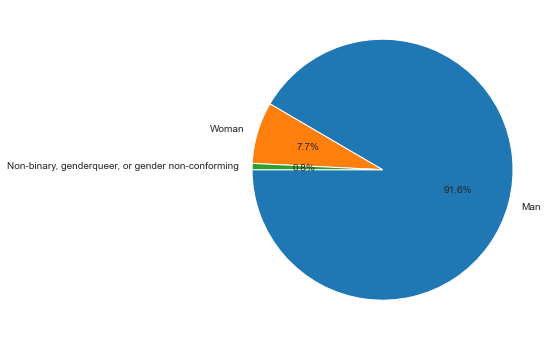

In [100]:
plt.figure(figsize=(12,6))
x=gen_count.index
y=gen_count
plt.pie(y,labels=x,autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. 
This number is lower than the overall percentage of women & non-binary genders in the programming community - 
which is estimated to be around 12%. 

Education Level
Formal education in computer science is often considered an essential requirement for becoming a programmer. 
However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. 
We'll use a horizontal bar plot here.

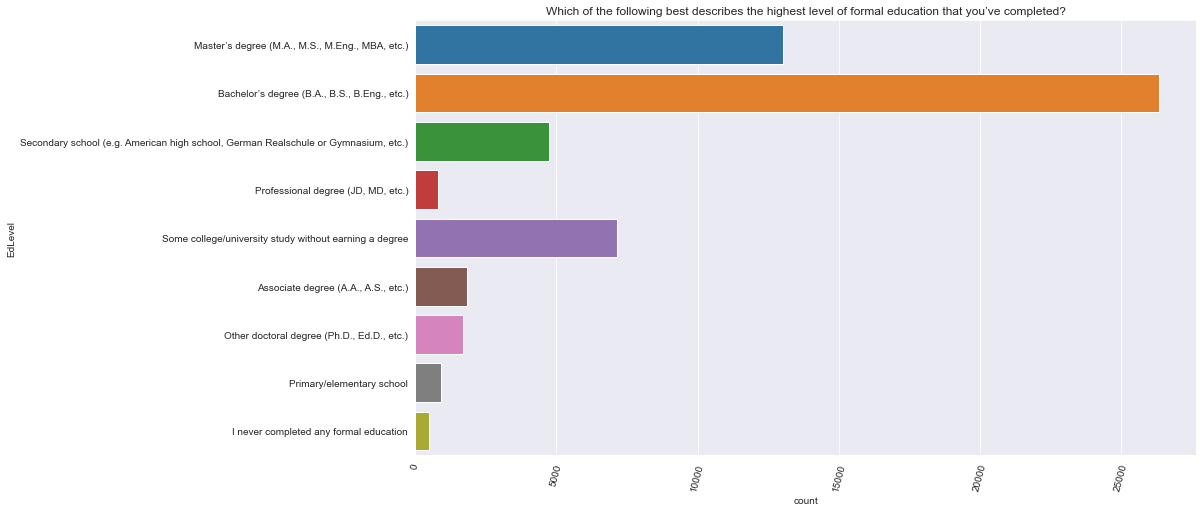

<Figure size 864x432 with 0 Axes>

In [154]:
sns.countplot(y=survey['EdLevel'])
plt.title(schema['EdLevel'])
plt.xticks(rotation=75)
plt.figure(figsize=(12,6))
plt.show();

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education.
However, it's not clear from this graph alone if they hold a degree in computer science. 

Let's also plot undergraduate majors, but this time we'll convert the numbers 
into percentages and sort the values to make it easier to visualize the order.

In [105]:
schema['UndergradMajor']

'What was your primary field of study?'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'What was your primary field of study?')

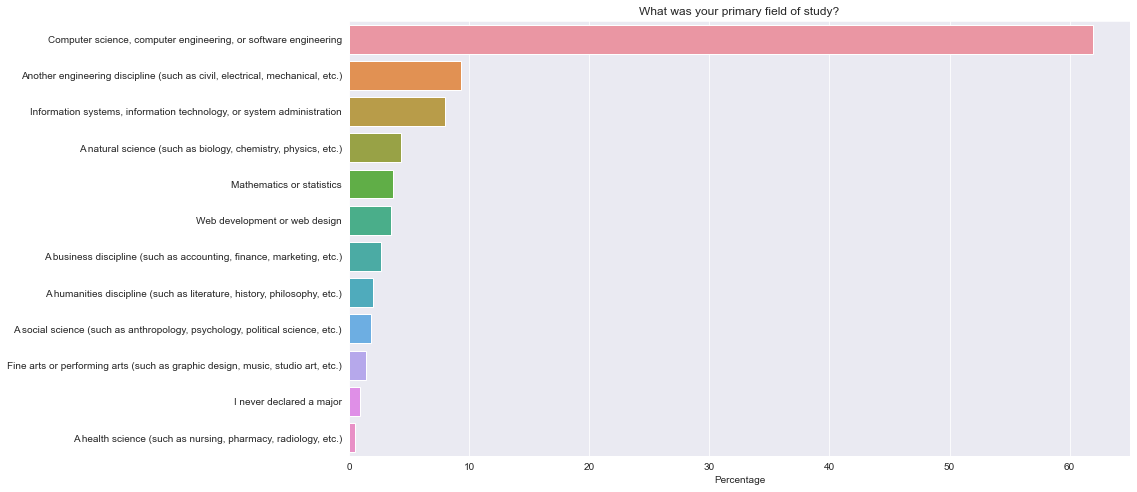

In [113]:
undergrad_pct = survey['UndergradMajor'].value_counts()*100/survey['UndergradMajor'].count()
y=undergrad_pct.index
sns.barplot(x,y)
plt.xlabel('Percentage')
plt.title(schema['UndergradMajor'])

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

In [156]:
schema['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

In [166]:
edimp_per=survey['NEWEdImpt'].value_counts()/survey['NEWEdImpt'].count()*100
x = edimp_per
y=x.index
sns.barplot(x,y)
plt.title(schema['NEWEdImpt'])
plt.xlabel('percentage')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In general , the formal eduacation is not important to get career , alot of people get highly position after they have self study.

Employment
Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. 
Let's visualize the data from the `Employment` column.

In [114]:
schema['Employment']

'Which of the following best describes your current employment status?'

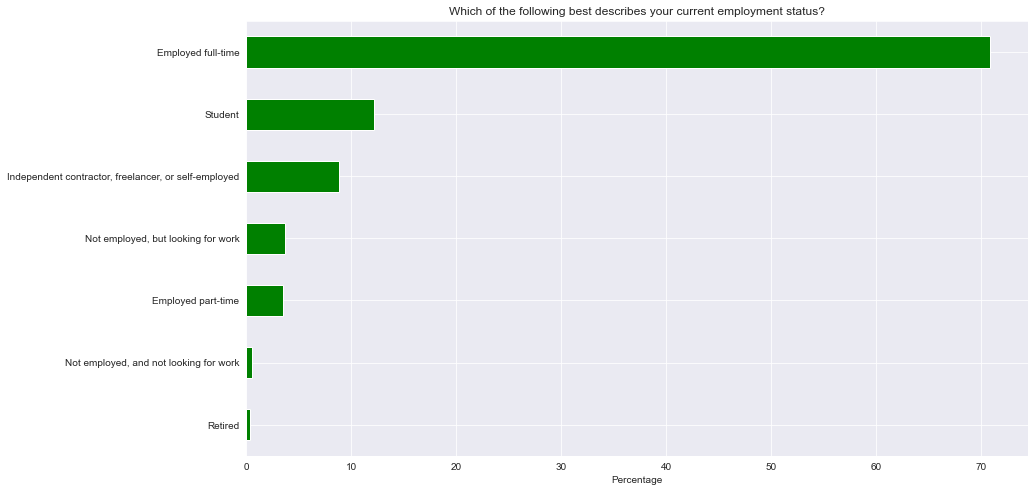

In [119]:
(survey['Employment'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema['Employment'])
plt.xlabel('Percentage');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


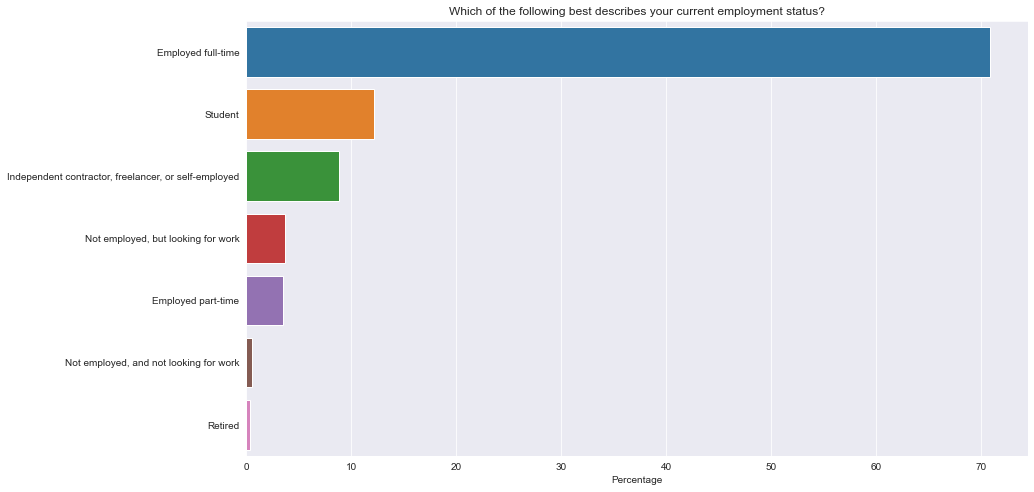

In [126]:
x = survey['Employment'].value_counts()*100/survey['Employment'].count()
y= x.index
sns.barplot(x,y)
plt.xlabel('Percentage')
plt.title(schema['Employment'])
plt.show()

It appears that close to 10% of respondents are employed part time or as freelancers.

In [127]:
schema['DevType']

'Which of the following describe you? Please select all that apply.'

In [128]:
survey['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                 4395
Developer, back-end                                                                                                                                                                                                                   3052
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                        2214
Developer, back-end;Developer, full-stack                                                                                                                                                                                             1464
Developer, front-end                                        

Let's define a helper function that turns a column containing lists of values (like `survey.DevType`)
into a data frame with one column for each possible option.

In [132]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [133]:
dev_type_df = split_multicolumn(survey.DevType)

In [134]:
dev_type_df

Developer, desktop or enterprise applications  Developer, full-stack  \
0                                               True                   True   
1                                              False                   True   
2                                              False                  False   
3                                              False                  False   
4                                              False                  False   
...                                              ...                    ...   
64456                                          False                  False   
64457                                          False                  False   
64458                                          False                  False   
64459                                          False                  False   
64460                                          False                  False   

       Developer, mobile  Designer  Developer, front-end  Developer, back-end  \
0                  False     False                 False                False   
1                   True     False                 False                False   
2                  False     False                 False                False   
3                  False     False                 False                False   
4                  False     False                 False                False   
...                  ...       ...                   ...                  ...   
64456              False     False                 False                False   
64457              False     False                 False                False   
64458              False     False                 False                False   
64459              False     False                 False                False   
64460              False     False                 False                False   

       Developer, QA or test  DevOps specialist  Developer, game or graphics  \
0                      False              False                        False   
1                      False              False                        False   
2                      False              False                        False   
3                      False              False                        False   
4                      False              False                        False   
...                      ...                ...                          ...   
64456                  False              False                        False   
64457                  False              False                        False   
64458                  False              False                        False   
64459                  False              False                        False   
64460                  False              False                        False   

       Database administrator  ...  System administrator  Engineering manager  \
0                       False  ...                 False                False   
1                       False  ...                 False                False   
2                       False  ...                 False                False   
3                       False  ...                 False                False   
4                       False  ...                 False                False   
...                       ...  ...                   ...                  ...   
64456                   False  ...                 False                False   
64457                   False  ...                 False                False   
64458                   False  ...                 False                False   
64459                   False  ...                 False                False   
64460                   False  ...                 False                False   

       Product manager  Data or business analyst  Academic researcher  \
0                False                     False                False   
1    

The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.

In [135]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26978
Developer, full-stack                            26901
Developer, front-end                             18118
Developer, desktop or enterprise applications    11678
Developer, mobile                                 9396
DevOps specialist                                 5908
Database administrator                            5653
Designer                                          5253
System administrator                              5177
Developer, embedded applications or devices       4696
Data or business analyst                          3966
Data scientist or machine learning specialist     3934
Developer, QA or test                             3888
Engineer, data                                    3695
Academic researcher                               3500
Educator                                          2891
Developer, game or graphics                       2749
Engineering manager                               2695
Product ma

In [136]:
import jovian

In [137]:
jovian.commit(project='stackholder survey')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mariamburai030/stackholder-survey" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mariamburai030/stackholder-survey


'https://jovian.ai/mariamburai030/stackholder-survey'

Asking and Answering Questions
We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

Asking and Answering Questions
We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

 Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [139]:
survey['LanguageDesireNextYear']

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64281, dtype: object

In [141]:
languages_desire = split_multicolumn(survey['LanguageDesireNextYear'])
languages_desire

C#  HTML/CSS  JavaScript  Python  Swift  Objective-C   Java   Ruby  \
0       True      True        True   False  False        False  False  False   
1      False     False       False    True   True        False  False  False   
2      False     False       False    True   True         True  False  False   
3      False     False       False   False  False        False  False  False   
4      False     False       False   False  False        False   True   True   
...      ...       ...         ...     ...    ...          ...    ...    ...   
64456  False     False       False   False  False        False  False  False   
64457   True      True        True    True   True         True   True   True   
64458  False     False       False   False  False        False  False  False   
64459  False      True        True   False  False        False   True  False   
64460   True      True        True   False  False        False   True  False   

       Scala    PHP  ...  Assembly  Bash/Shell/PowerShell      C  Haskell  \
0      False  False  ...     False                  False  False    False   
1      False  False  ...     False                  False  False    False   
2      False  False  ...     False                  False  False    False   
3      False  False  ...     False                  False  False    False   
4       True  False  ...     False                  False  False    False   
...      ...    ...  ...       ...                    ...    ...      ...   
64456  False  False  ...     False                  False  False    False   
64457   True   True  ...      True                   True   True     True   
64458  False  False  ...     False                  False  False    False   
64459  False  False  ...     False                  False  False    False   
64460  False  False  ...     False                  False  False    False   

        Perl    C++  Julia  Kotlin   Dart    VBA  
0      False  False  False   False  False  False  
1      False  False  False   False  False  False  
2      False  False  False   False  False  False  
3      False  False  False   False  False  False  
4      False  False  False   False  False  False  
...      ...    ...    ...     ...    ...    ...  
64456  False  False  False   False  False  False  
64457   True   True   True    True   True   True  
64458  False  False  False   False  False  False  
64459  False  False  False   False  False  False  
64460  False  False  False   False  False  False  

[64281 rows x 25 columns]

It appears that a total of 25 languages were included among the options. (number of column)
Let's aggregate these to identify the percentage of respondents who selected each language.

In [144]:
#aggragate
languages_desire_percentage = (languages_desire.mean().sort_values(ascending=False))*100
languages_desire_percentage


Python                   41.145906
JavaScript               40.427187
HTML/CSS                 32.028127
SQL                      30.803815
TypeScript               26.443273
C#                       21.060656
Java                     20.467945
Go                       19.430314
Bash/Shell/PowerShell    18.058213
Rust                     16.272304
C++                      15.016879
Kotlin                   14.758638
PHP                      10.942580
C                         9.358909
Swift                     8.691526
Dart                      7.306980
R                         6.571149
Ruby                      6.421804
Scala                     5.325057
Haskell                   4.595448
Assembly                  3.763165
Julia                     2.541964
Objective-C               2.338171
Perl                      1.761018
VBA                       1.611674
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


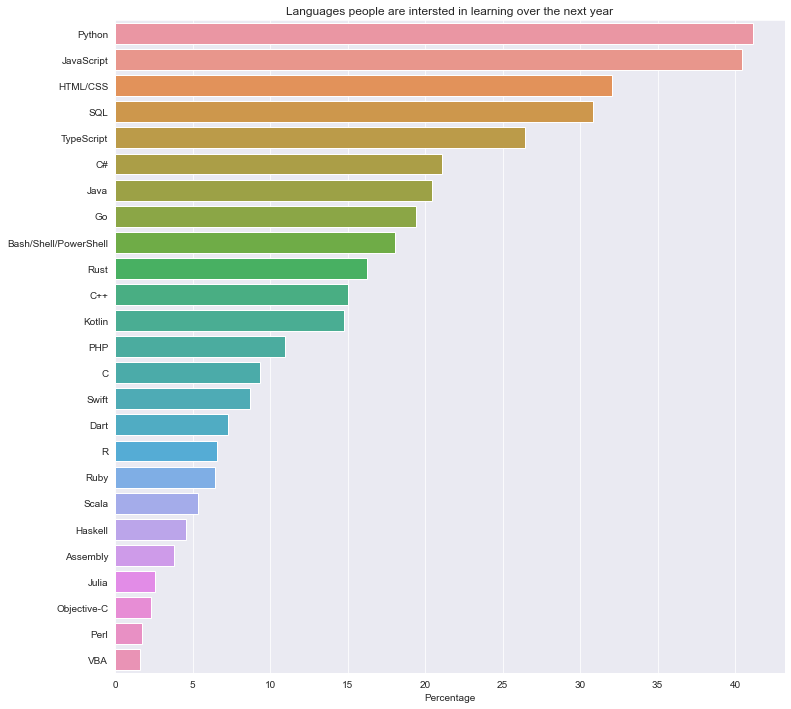

In [148]:
x = languages_desire_percentage
y = x.index
plt.figure(figsize=(12, 12))
sns.barplot(x,y)
plt.xlabel('Percentage')
plt.title('Languages people are intersted in learning over the next year')
plt.show()

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. We're using Python for this very analysis, so we're in good company!

In [ ]:
Q: In which countries do developers work the highest number of hours per week? 
    idea:   groupby` data frame method to aggregate

Consider countries with more than 250 responses only.
To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. 
We'll also need to filter the results to only include the countries with more than 250 respondents.

In [194]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
countries_df


WorkWeekHrs
Country                                 
Angola                         72.333333
Kuwait                         58.222222
Norway                         55.451557
United Republic of Tanzania    55.384615
Finland                        52.694828
...                                  ...
North Korea                          NaN
Saint Lucia                          NaN
Sierra Leone                         NaN
Solomon Islands                      NaN
Timor-Leste                          NaN

[183 rows x 1 columns]

In [195]:
high_response_countries_df = countries_df.loc[survey['Country'].value_counts() > 250].head(15)
high_response_countries_df 

WorkWeekHrs
Country                    
Norway            55.451557
Finland           52.694828
Iran              46.012903
Israel            44.744731
Turkey            43.772026
Austria           43.176923
Viet Nam          42.371901
China             42.134752
Hungary           41.926966
Greece            41.823643
United States     41.792403
South Africa      41.371345
Czech Republic    41.282486
Bangladesh        41.082988
Serbia            40.843590

Norway ,Finland and Iran have the highest working hours, followed by the United States. 
However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

Q: How important is it to start young to build a career in programming?


Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [196]:
schema['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [1]:
survey['YearsCodePro']

NameError: name 'survey' is not defined